In [23]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action = 'ignore')

In [2]:
PD=pandas.read_csv("Population_Data.csv")
PD.head()

,Region,Office Location Id,Indians,Foreigners,Indian_Male,Indian_Female,Foreigners_Male,Foreigners_Female,Total Population
0,Region 31,1,"6,43,596","28,83,782","4,40,445","2,03,151","27,63,718","72,515","35,27,378"
1,Region 17,9,"3,19,933","15,01,899","2,13,477","1,06,456","14,49,303","27,671",1821832
2,Region 12,4,"1,94,379","6,50,744","1,61,803","32,576","6,31,660","10,652",845123
3,Region 22,15,"1,07,360","4,70,708","85,343","22,017","4,50,267","6,389",578068
4,Region 23,13,"55,351","3,29,980","31,796","23,555","3,25,105","3,684",385331


# Preprocessing

In [3]:
PD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Region              38 non-null     object
 1   Office Location Id  38 non-null     int64 
 2   Indians             38 non-null     object
 3   Foreigners          38 non-null     object
 4   Indian_Male         38 non-null     object
 5   Indian_Female       38 non-null     object
 6   Foreigners_Male     38 non-null     object
 7   Foreigners_Female   38 non-null     object
 8   Total Population    38 non-null     object
dtypes: int64(1), object(8)
memory usage: 1.5+ KB


##### The object features above are actually numeric variables, but they are shown as object because they are seperated by commas. Therefore, we need to convert the variables to numerical type since scikit learn only deals with numerical data types

In [4]:
numeric=["Indians", "Foreigners", "Indian_Male", "Indian_Female", "Foreigners_Male", "Foreigners_Female", "Total Population"]

#### Function to remove commas from the element:

In [5]:
def cleaner(x):
    return x.replace(',','')

In [6]:
for i in PD[numeric]:
    PD[i]=PD[i].apply(cleaner)
    
PD.head()

,Region,Office Location Id,Indians,Foreigners,Indian_Male,Indian_Female,Foreigners_Male,Foreigners_Female,Total Population
0,Region 31,1,643596,2883782,440445,203151,2763718,72515,3527378
1,Region 17,9,319933,1501899,213477,106456,1449303,27671,1821832
2,Region 12,4,194379,650744,161803,32576,631660,10652,845123
3,Region 22,15,107360,470708,85343,22017,450267,6389,578068
4,Region 23,13,55351,329980,31796,23555,325105,3684,385331


In [7]:
PD[numeric]=PD[numeric].apply(pandas.to_numeric)
PD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Region              38 non-null     object
 1   Office Location Id  38 non-null     int64 
 2   Indians             38 non-null     int64 
 3   Foreigners          38 non-null     int64 
 4   Indian_Male         38 non-null     int64 
 5   Indian_Female       38 non-null     int64 
 6   Foreigners_Male     38 non-null     int64 
 7   Foreigners_Female   38 non-null     int64 
 8   Total Population    38 non-null     int64 
dtypes: int64(8), object(1)
memory usage: 2.6+ KB


##### Now, all the data types have been changed to numeric

### Verifying Integrity:

##### We can check the integrity of data, for eg. by checking if Sum of Indians + Sum of Foreigners = Total Population

In [8]:
PD[['Indians', 'Foreigners']].sum().sum() - PD['Total Population'].sum()

0

##### Checking if No. of Females + No. of Males = Total Population:

In [9]:
PD[['Indian_Male', 'Indian_Female', 'Foreigners_Male', 'Foreigners_Female']].sum().sum() - PD['Total Population'].sum()

-112859

##### Therefore the total population value is greater than the no. of males and females. That means there are people in the population who do not identify themselves as male or female. So we need to create a new feature called "other" for these people

In [13]:
PD['others'] = PD['Total Population'] - (PD['Indian_Male'] + PD['Indian_Female'] + PD['Foreigners_Male'] + 
                                         PD['Foreigners_Female'])
PD.head()

,Region,Office Location Id,Indians,Foreigners,Indian_Male,Indian_Female,Foreigners_Male,Foreigners_Female,Total Population,others
0,Region 31,1,643596,2883782,440445,203151,2763718,72515,3527378,47549
1,Region 17,9,319933,1501899,213477,106456,1449303,27671,1821832,24925
2,Region 12,4,194379,650744,161803,32576,631660,10652,845123,8432
3,Region 22,15,107360,470708,85343,22017,450267,6389,578068,14052
4,Region 23,13,55351,329980,31796,23555,325105,3684,385331,1191


In [15]:
PD['Region'].nunique(), PD['Office Location Id'].nunique()

(38, 38)

##### Both 'Region' and 'Office Location Id' contain 38 unique values which is equal to the total no. of observations = 38. So, these two features do not contain any useful information

##### We will also drop 'Total Population' because it can be defined by the other features

In [16]:
PD1=PD.drop(columns=['Region', 'Office Location Id', 'Total Population'])
PD1.head()

,Indians,Foreigners,Indian_Male,Indian_Female,Foreigners_Male,Foreigners_Female,others
0,643596,2883782,440445,203151,2763718,72515,47549
1,319933,1501899,213477,106456,1449303,27671,24925
2,194379,650744,161803,32576,631660,10652,8432
3,107360,470708,85343,22017,450267,6389,14052
4,55351,329980,31796,23555,325105,3684,1191


### Normalizing:

In [17]:
from sklearn.preprocessing import Normalizer
norm=Normalizer()
col=PD1.columns
PD1=norm.fit_transform(PD1)
PD1=pandas.DataFrame(data=PD1, columns=col)
PD1.head()

,Indians,Foreigners,Indian_Male,Indian_Female,Foreigners_Male,Foreigners_Female,others
0,0.157911,0.707555,0.108066,0.049844,0.678096,0.017792,0.011666
1,0.150537,0.706682,0.100446,0.050090,0.681934,0.013020,0.011728
2,0.206311,0.690691,0.171736,0.034576,0.670436,0.011306,0.008950
3,0.161150,0.706543,0.128102,0.033048,0.675861,0.009590,0.021092
4,0.118217,0.704763,0.067909,0.050308,0.694351,0.007868,0.002544


# Clustering

In [19]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=2)
kmeans.fit(PD1)
pred=kmeans.predict(PD1)
pred, len(pred)

(array([1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]),
 38)

In [20]:
kmeans.inertia_

0.028113285898827122

### Using Inertia to find the best value for Number of Clusters (n_clusters): 

In [24]:
I_scores=[]
for cluster in range(1,10):
    kmeans=KMeans(n_clusters=cluster, n_jobs=-1)
    kmeans.fit(PD1)
    I_scores.append(kmeans.inertia_)

In [26]:
inertia_frame=pandas.DataFrame({'No. of Clusters':range(1,10), 'Inertia Scores':I_scores})
inertia_frame

,No. of Clusters,Inertia Scores
0,1,0.072260
1,2,0.028113
2,3,0.017667
3,4,0.012200
4,5,0.009471
5,6,0.007828
6,7,0.006231
7,8,0.004936
8,9,0.004090


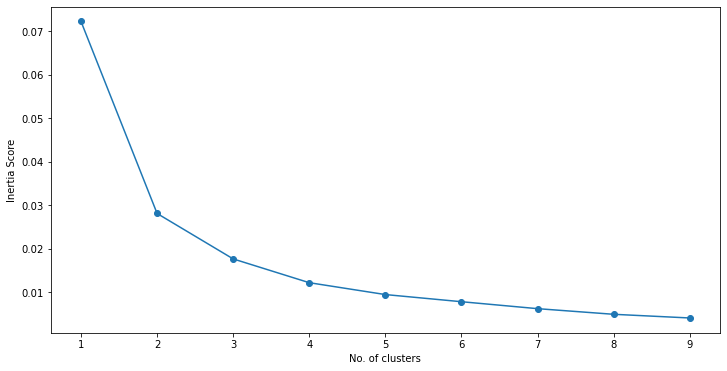

In [28]:
plt.figure(figsize=(12,6))
plt.plot(inertia_frame['No. of Clusters'], inertia_frame['Inertia Scores'], marker='o')
plt.xlabel("No. of clusters")
plt.ylabel("Inertia Score")
plt.show()

##### From the graph it is clear that the ideal number of clusters is 3, 4 or 5 because they have the least decrease in inertia value

In [30]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(PD1)
pred=kmeans.predict(PD1)
x
#New columns for predictions:
PD1['cluster']=pred

In [31]:
PD1.head()

,Indians,Foreigners,Indian_Male,Indian_Female,Foreigners_Male,Foreigners_Female,others,cluster
0,0.157911,0.707555,0.108066,0.049844,0.678096,0.017792,0.011666,2
1,0.150537,0.706682,0.100446,0.050090,0.681934,0.013020,0.011728,2
2,0.206311,0.690691,0.171736,0.034576,0.670436,0.011306,0.008950,1
3,0.161150,0.706543,0.128102,0.033048,0.675861,0.009590,0.021092,1
4,0.118217,0.704763,0.067909,0.050308,0.694351,0.007868,0.002544,0


##### Function to define the segregration of different clusters and plot it:

In [33]:
def seg(str_x, str_y, clusters):
    x=[]
    y=[]
    
    for i in range(clusters):
        x.append(PD1[str_x][PD1['cluster']==i])
        y.append(PD1[str_y][PD1['cluster']==i])
        
    return x,y

In [38]:
def plot_clusters(str_x, str_y, clusters):
    plt.figure(dpi=120, figsize=(5,5))
    
    x,y=seg(str_x, str_y, clusters)
    
    for i in range(clusters):
        plt.scatter(x[i], y[i], label="cluster {}".format(i))
        
    plt.xlabel(str_x)
    plt.ylabel(str_y)
    plt.show

#### Plotting:

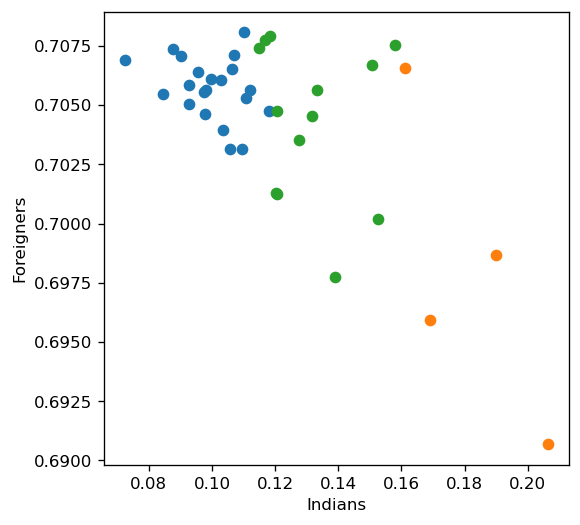

In [39]:
plot_clusters('Indians', 'Foreigners', 3)

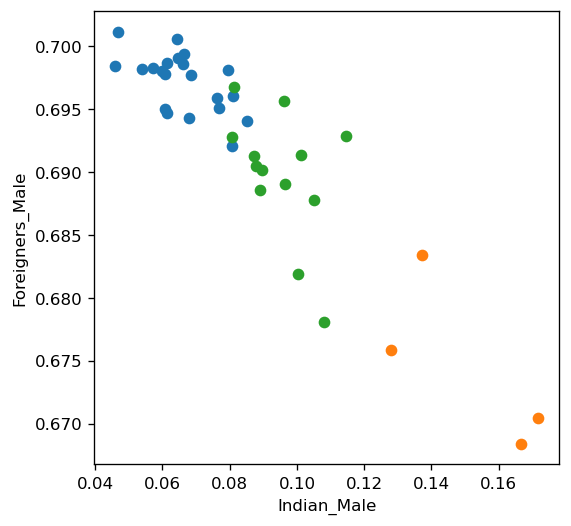

In [40]:
plot_clusters("Indian_Male", "Foreigners_Male", 3)

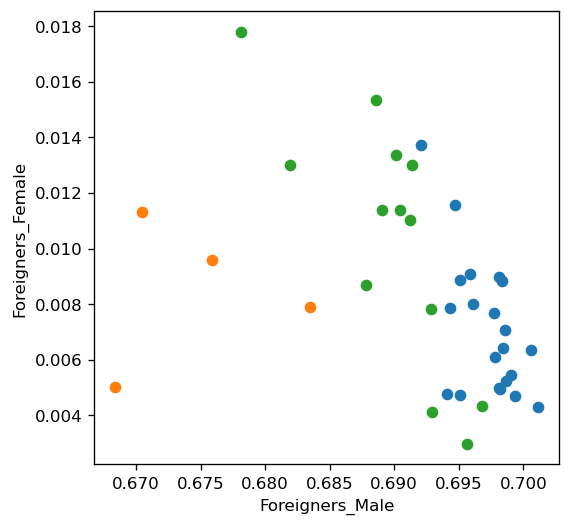

In [41]:
plot_clusters("Foreigners_Male", "Foreigners_Female", 3)

In [4]:
import pandas as pd
import numpy as np

In [2]:
df2=pd.DataFrame({'X':['B','B','A','A'], 'Y':[1,2,3,4]})

In [5]:
df2.groupby(['X']).agg([np.sum, np.mean, np.std])

Y               
  sum mean       std
X                   
A   7  3.5  0.707107
B   3  1.5  0.707107

In [6]:
a=[1,2,3,4]
b=[1,2,3]

In [7]:
a.extend(b)

In [8]:
a

[1, 2, 3, 4, 1, 2, 3]

In [11]:
x=pd.Series([1,2,3])
x

0    1
1    2
2    3
dtype: int64

In [12]:
np.mean(x)

2.0

In [13]:
np.array([1,2,3])

array([1, 2, 3])